In [55]:
import pandas as pd
paddy_data = pd.read_csv("data\paddy.csv", encoding = 'utf-8', index_col='tt') 
  
# print first 5 rows of zoo data  
print(paddy_data.head())

    band1  band2  band3  band4  label
tt                                   
0    1128   1153    762   3199      1
1    1116   1106    711   3222      1
2    1214   1173   1013   1498      1
3    1091   1115    716   3034      1
4    1090   1093    670   2975      1


In [56]:
# X data
X=paddy_data[['band1','band2','band3','band4','label']]

In [86]:
X.head()

,band1,band2,band3,band4,label
tt,,,,,
0,1128,1153,762,3199,1
1,1116,1106,711,3222,1
2,1214,1173,1013,1498,1
3,1091,1115,716,3034,1
4,1090,1093,670,2975,1


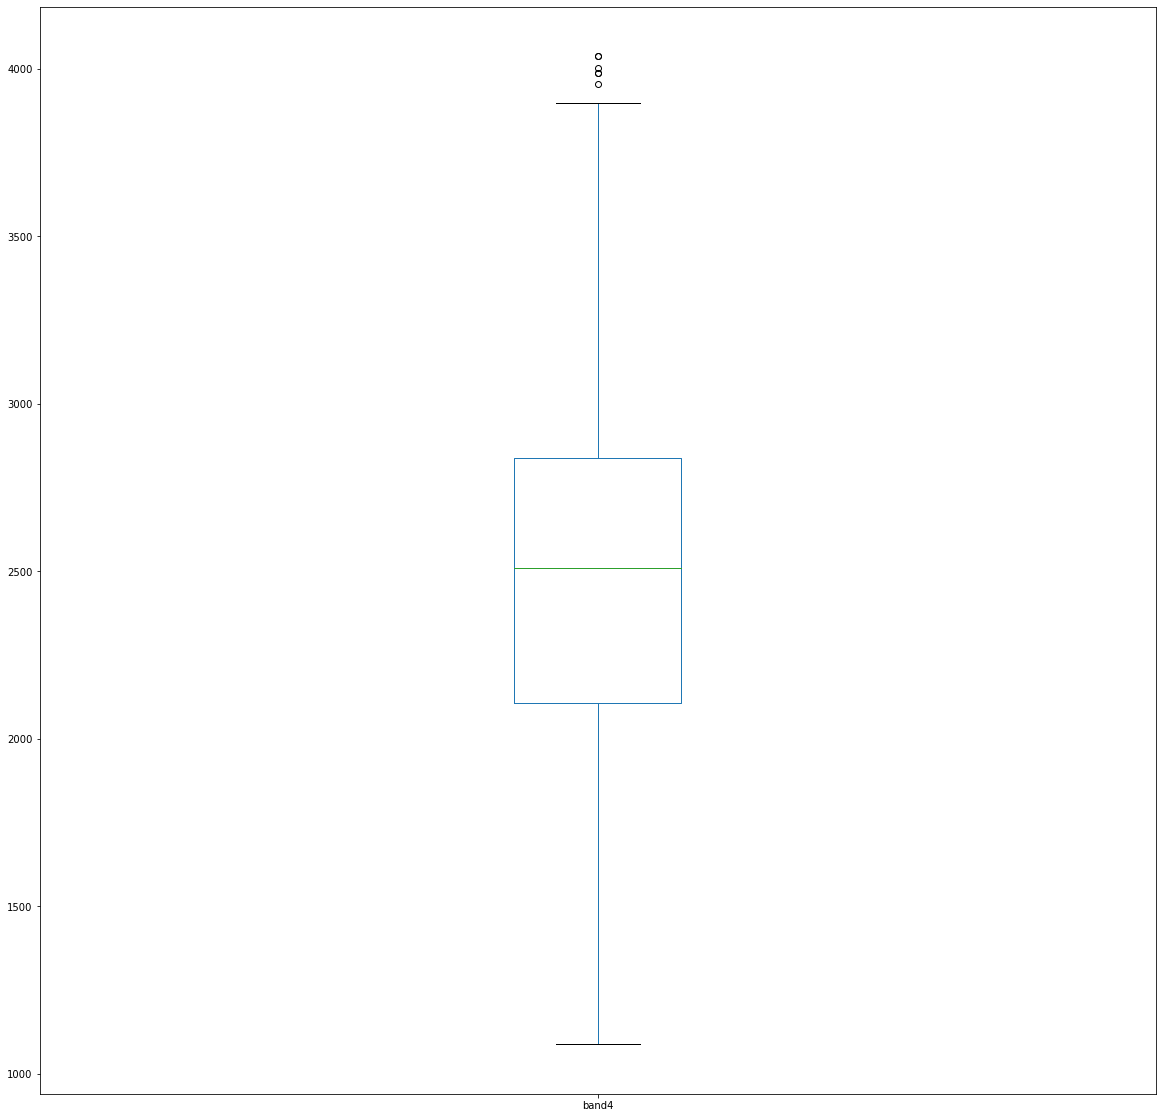

In [89]:
X['band4'].plot(kind='box')

In [58]:
from sklearn.cluster import KMeans 
clusters = 2
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(X) 
  
print(kmeans.labels_[0:100])

[1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [52]:
from sklearn.decomposition import PCA 
  
pca = PCA(3) 
pca.fit(X) 
  
pca_data = pd.DataFrame(pca.transform(X)) 
  
print(pca_data.head())

            0           1          2
0  728.720805  116.753736  36.004652
1  769.429849   60.469215  28.947011
2 -972.211621 -149.224837  39.785398
3  590.468192    3.519632  21.481086
4  548.602283  -59.796630  35.494316


In [50]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

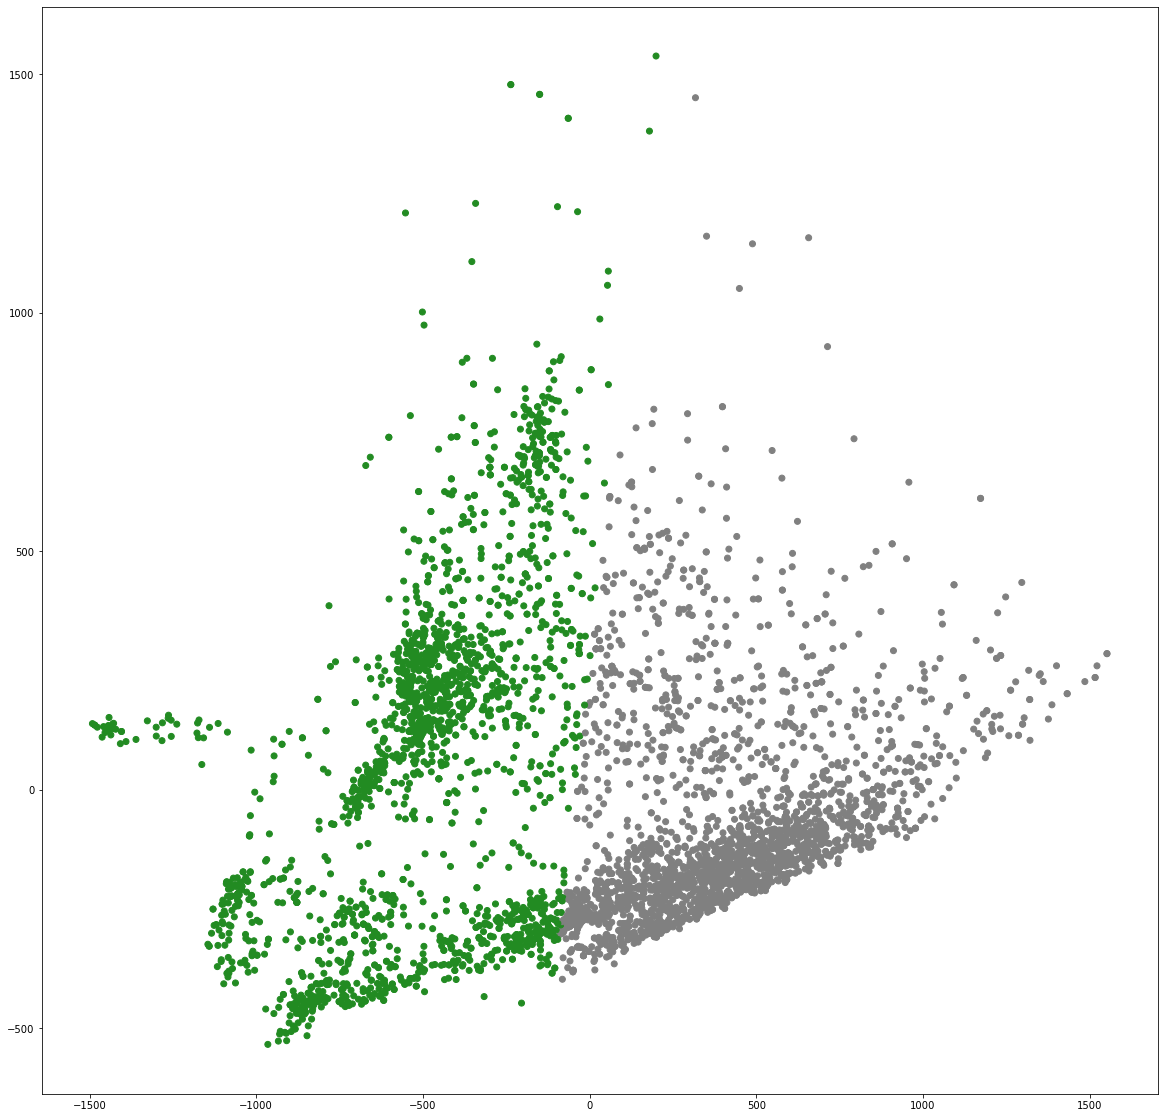

In [51]:
# plot 2D
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"]=20,20

plt.scatter(pca_data[0], pca_data[1], c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_)))

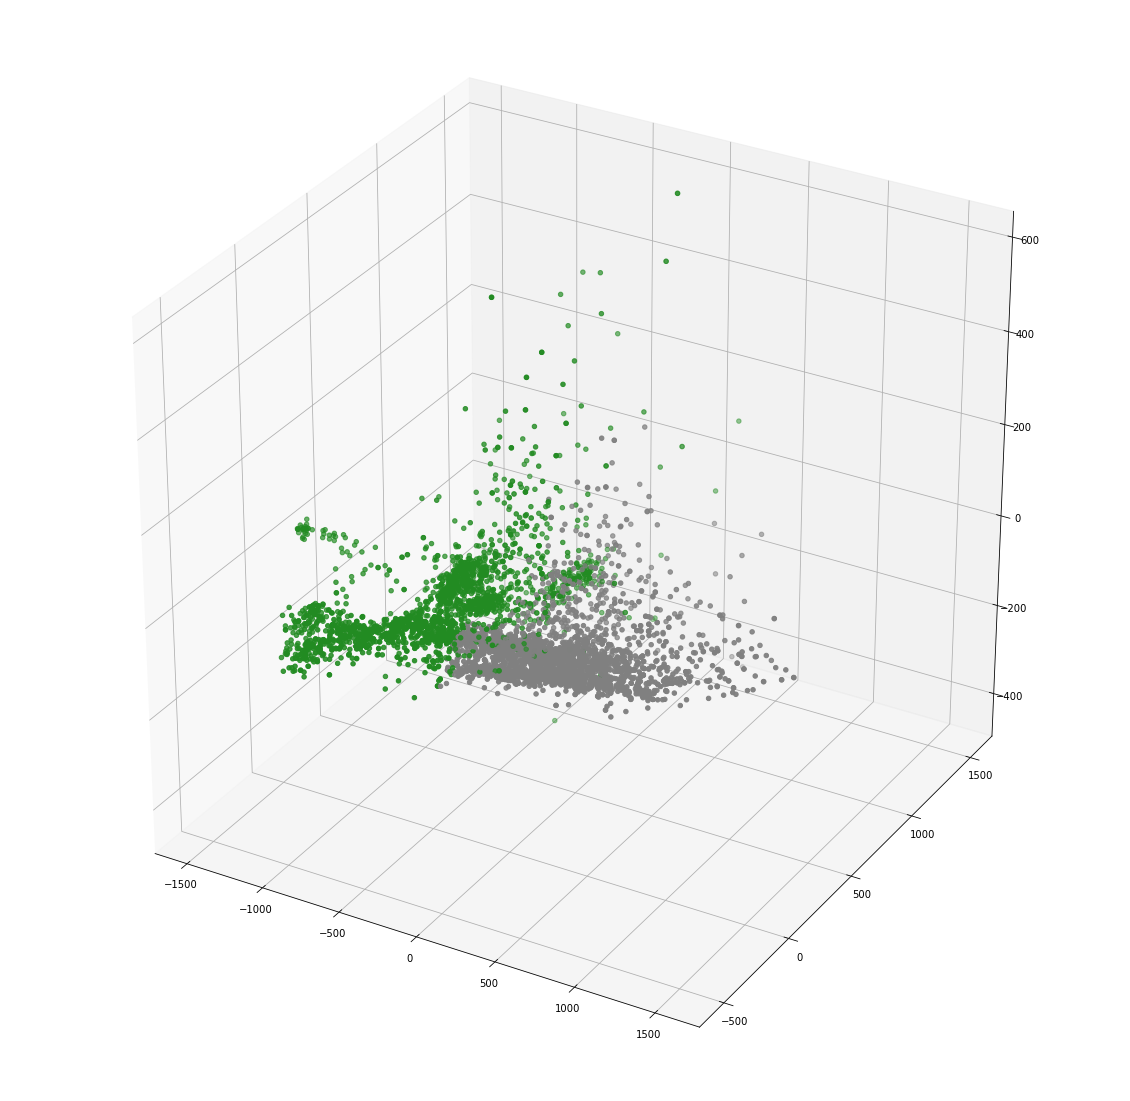

In [54]:
# from mpl_toolkits.mplot3d import Axes3D 

   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
# list(map(lambda data1, data2, data3, str_label: 
#         ax.text(data1, data2, data3, s = str_label, size = 16.5, 
#         zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
#         pca_data[2], str_labels)) 
   
plt.show() 

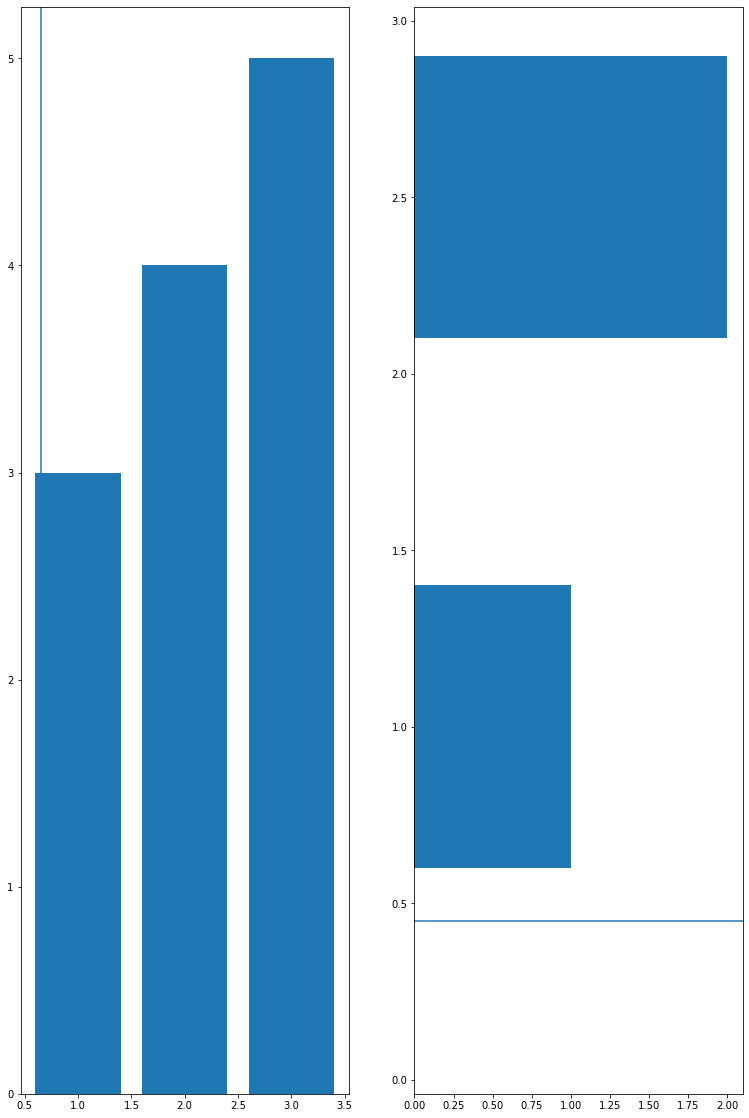

In [79]:
import numpy as np

# Initialize the plot
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax2.axhline(0.45)
ax1.axvline(0.65)
ax3.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

# Delete `ax3`
fig.delaxes(ax3)

# Show the plot
plt.show()

In [80]:
import matplotlib

matplotlib.matplotlib_fname()

'C:\\Anaconda3\\envs\\sklearn\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'